In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns

In [11]:
# Load the data. 
# EPL results for the 2017/18 season

EPL18 = pd.read_excel('EPL2017-18.xlsx')
print(EPL18.columns.tolist())
EPL18.head()

['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR']


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,20170811,Arsenal,Leicester,4,3,H
1,20170812,Brighton,Man City,0,2,A
2,20170812,Chelsea,Burnley,2,3,A
3,20170812,Crystal Palace,Huddersfield,0,3,A
4,20170812,Everton,Stoke,1,0,H


In [12]:
EPL18["hwin"] = np.where(EPL18["FTR"] == "H", 1 , np.where(EPL18["FTR"]=="D", 0.5, 0))
EPL18["awin"] = np.where(EPL18["FTR"] == "A", 1 , np.where(EPL18["FTR"]=="D", 0.5, 0))
EPL18["count"] = 1
EPL18

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,hwin,awin,count
0,20170811,Arsenal,Leicester,4,3,H,1.0,0.0,1
1,20170812,Brighton,Man City,0,2,A,0.0,1.0,1
2,20170812,Chelsea,Burnley,2,3,A,0.0,1.0,1
3,20170812,Crystal Palace,Huddersfield,0,3,A,0.0,1.0,1
4,20170812,Everton,Stoke,1,0,H,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...
375,20180513,Newcastle,Chelsea,3,0,H,1.0,0.0,1
376,20180513,Southampton,Man City,0,1,A,0.0,1.0,1
377,20180513,Swansea,Stoke,1,2,A,0.0,1.0,1
378,20180513,Tottenham,Leicester,5,4,H,1.0,0.0,1


In [13]:
half1 = EPL18[EPL18["Date"] < 20180000]
half2 = EPL18[EPL18["Date"] > 20180000]

print(half1.head())

       Date        HomeTeam      AwayTeam  FTHG  FTAG FTR  hwin  awin  count
0  20170811         Arsenal     Leicester     4     3   H   1.0   0.0      1
1  20170812        Brighton      Man City     0     2   A   0.0   1.0      1
2  20170812         Chelsea       Burnley     2     3   A   0.0   1.0      1
3  20170812  Crystal Palace  Huddersfield     0     3   A   0.0   1.0      1
4  20170812         Everton         Stoke     1     0   H   1.0   0.0      1


In [15]:
half1home = half1.groupby("HomeTeam")["FTHG", "FTAG", "hwin", "count"].sum().reset_index()
half1home.rename(columns={"HomeTeam": "team", "FTHG":"scoredH", "FTAG": "concededH", "count": "hg"}, inplace=True)
half1home

/tmp/ipykernel_1844922/2770281210.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  half1home = half1.groupby("HomeTeam")["FTHG", "FTAG", "hwin", "count"].sum().reset_index()


,team,scoredH,concededH,hwin,hg
0,Arsenal,25,10,8.5,10
1,Bournemouth,14,17,4.5,11
2,Brighton,10,12,5.5,10
3,Burnley,7,6,6.0,10
4,Chelsea,21,7,8.5,11
5,Crystal Palace,14,18,5.0,11
6,Everton,17,13,6.5,10
7,Huddersfield,10,12,6.0,11
8,Leicester,13,14,5.0,10
9,Liverpool,21,4,8.5,11


In [16]:
half1away = half1.groupby("AwayTeam")["FTHG", "FTAG", "awin", "count"].sum().reset_index()
half1away.rename(columns={"AwayTeam": "team", "FTAG":"scoredA", "FTHG": "concededA", "count": "ag"}, inplace=True)
half1away

/tmp/ipykernel_1844922/1786648003.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  half1away = half1.groupby("AwayTeam")["FTHG", "FTAG", "awin", "count"].sum().reset_index()


,team,concededA,scoredA,awin,ag
0,Arsenal,16,13,5.0,11
1,Bournemouth,15,6,3.0,10
2,Brighton,13,5,3.0,11
3,Burnley,11,11,6.5,11
4,Chelsea,7,18,7.0,10
5,Crystal Palace,14,4,2.5,10
6,Everton,19,8,3.5,11
7,Huddersfield,20,8,3.0,10
8,Leicester,18,18,5.0,11
9,Liverpool,20,27,6.5,10


In [17]:
epl17 = pd.merge(half1home, half1away, on="team")
epl17["gp"] = epl17["hg"] + epl17["ag"]
epl17["wins"] = epl17["hwin"] + epl17["awin"]
epl17["scored"] = epl17["scoredH"] + epl17["scoredA"]
epl17["conceded"] = epl17["concededH"] + epl17["concededA"]

epl17["wpc17"] = (epl17["hwin"] + epl17["awin"]) / (epl17["hg"] + epl17["ag"])
epl17["pyth17"] = epl17["scored"]**2 / (epl17["scored"]**2 + epl17["conceded"]**2)
epl17

,team,scoredH,concededH,hwin,hg,concededA,scoredA,awin,ag,gp,wins,scored,conceded,wpc17,pyth17
0,Arsenal,25,10,8.5,10,16,13,5.0,11,21,13.5,38,26,0.642857,0.681132
1,Bournemouth,14,17,4.5,11,15,6,3.0,10,21,7.5,20,32,0.357143,0.280899
2,Brighton,10,12,5.5,10,13,5,3.0,11,21,8.5,15,25,0.404762,0.264706
3,Burnley,7,6,6.0,10,11,11,6.5,11,21,12.5,18,17,0.595238,0.528548
4,Chelsea,21,7,8.5,11,7,18,7.0,10,21,15.5,39,14,0.738095,0.885847
5,Crystal Palace,14,18,5.0,11,14,4,2.5,10,21,7.5,18,32,0.357143,0.240356
6,Everton,17,13,6.5,10,19,8,3.5,11,21,10.0,25,32,0.476190,0.379018
7,Huddersfield,10,12,6.0,11,20,8,3.0,10,21,9.0,18,32,0.428571,0.240356
8,Leicester,13,14,5.0,10,18,18,5.0,11,21,10.0,31,32,0.476190,0.484131
9,Liverpool,21,4,8.5,11,20,27,6.5,10,21,15.0,48,24,0.714286,0.800000


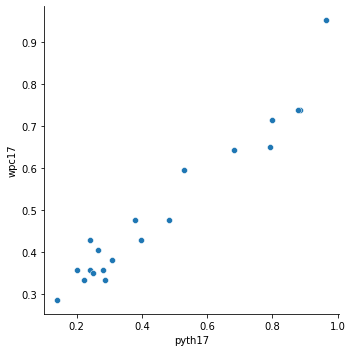

In [18]:
# Plot the data

sns.relplot(x="pyth17", y="wpc17", data =epl17)

In [19]:
# Run the regression

pyth_lm = smf.ols(formula = 'wpc17 ~ pyth17', data=epl17).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  wpc17   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     269.6
Date:                Mon, 07 Mar 2022   Prob (F-statistic):           2.81e-12
Time:                        18:30:01   Log-Likelihood:                 33.822
No. Observations:                  20   AIC:                            -63.64
Df Residuals:                      18   BIC:                            -61.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1978      0.021      9.335      0.000       0.153       0.242
pyth17         0.6551      0.040     16.420      0.000       0.571       0.739
==============================================================================
Omnibus:                        6.775   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                4.322
Skew:                           1.048   Prob(JB):                        0.115
Kurtosis:                       3.891   Cond. No.                         4.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
half2home = half2.groupby("HomeTeam")["FTHG", "FTAG", "hwin", "count"].sum().reset_index()
half2home.rename(columns={"HomeTeam": "team", "FTHG":"scoredH", "FTAG": "concededH", "count": "hg"}, inplace=True)
half2home

/tmp/ipykernel_1844922/2009054675.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  half2home = half2.groupby("HomeTeam")["FTHG", "FTAG", "hwin", "count"].sum().reset_index()


,team,scoredH,concededH,hwin,hg
0,Arsenal,29,10,7.5,9
1,Bournemouth,12,13,5.0,8
2,Brighton,14,13,5.5,9
3,Burnley,9,11,3.5,9
4,Chelsea,9,9,4.5,8
5,Crystal Palace,15,9,4.5,8
6,Everton,11,9,5.5,9
7,Huddersfield,6,13,2.5,8
8,Leicester,12,8,5.0,9
9,Liverpool,24,6,7.0,8


In [21]:
half2away = half2.groupby("AwayTeam")["FTHG", "FTAG", "awin", "count"].sum().reset_index()
half2away.rename(columns={"AwayTeam": "team", "FTAG":"scoredA", "FTHG": "concededA", "count": "ag"}, inplace=True)
half2away

/tmp/ipykernel_1844922/1311690105.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  half2away = half2.groupby("AwayTeam")["FTHG", "FTAG", "awin", "count"].sum().reset_index()


,team,concededA,scoredA,awin,ag
0,Arsenal,15,7,1.0,8
1,Bournemouth,16,13,4.0,9
2,Brighton,16,5,1.5,8
3,Burnley,11,9,4.0,8
4,Chelsea,15,14,4.5,9
5,Crystal Palace,14,12,4.5,9
6,Everton,17,8,2.5,8
7,Huddersfield,13,4,2.5,9
8,Leicester,20,13,2.5,8
9,Liverpool,8,12,5.0,9


In [22]:
epl18 = pd.merge(half2home, half2away, on="team")
epl18["gp"] = epl18["hg"] + epl18["ag"]
epl18["wins"] = epl18["hwin"] + epl18["awin"]
epl18["scored"] = epl18["scoredH"] + epl18["scoredA"]
epl18["conceded"] = epl18["concededH"] + epl18["concededA"]

epl18["wpc18"] = (epl18["hwin"] + epl18["awin"]) / (epl18["hg"] + epl18["ag"])
epl18["pyth18"] = epl18["scored"]**2 / (epl18["scored"]**2 + epl18["conceded"]**2)
epl18

,team,scoredH,concededH,hwin,hg,concededA,scoredA,awin,ag,gp,wins,scored,conceded,wpc18,pyth18
0,Arsenal,29,10,7.5,9,15,7,1.0,8,17,8.5,36,25,0.500000,0.674649
1,Bournemouth,12,13,5.0,8,16,13,4.0,9,17,9.0,25,29,0.529412,0.426330
2,Brighton,14,13,5.5,9,16,5,1.5,8,17,7.0,19,29,0.411765,0.300333
3,Burnley,9,11,3.5,9,11,9,4.0,8,17,7.5,18,22,0.441176,0.400990
4,Chelsea,9,9,4.5,8,15,14,4.5,9,17,9.0,23,24,0.529412,0.478733
5,Crystal Palace,15,9,4.5,8,14,12,4.5,9,17,9.0,27,23,0.529412,0.579491
6,Everton,11,9,5.5,9,17,8,2.5,8,17,8.0,19,26,0.470588,0.348120
7,Huddersfield,6,13,2.5,8,13,4,2.5,9,17,5.0,10,26,0.294118,0.128866
8,Leicester,12,8,5.0,9,20,13,2.5,8,17,7.5,25,28,0.441176,0.443577
9,Liverpool,24,6,7.0,8,8,12,5.0,9,17,12.0,36,14,0.705882,0.868633


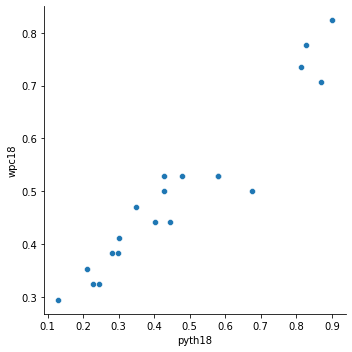

In [23]:
# Plot the data

sns.relplot(x="pyth18", y="wpc18", data =epl18)

In [24]:
# Run the regression

pyth_lm = smf.ols(formula = 'wpc18 ~ pyth18', data=epl18).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  wpc18   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     191.1
Date:                Mon, 07 Mar 2022   Prob (F-statistic):           5.02e-11
Time:                        18:30:40   Log-Likelihood:                 34.030
No. Observations:                  20   AIC:                            -64.06
Df Residuals:                      18   BIC:                            -62.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2040      0.024      8.586      0.000       0.154       0.254
pyth18         0.6237      0.045     13.823      0.000       0.529       0.718
==============================================================================
Omnibus:                        5.199   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                2.933
Skew:                          -0.826   Prob(JB):                        0.231
Kurtosis:                       3.890   Cond. No.                         5.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
predictor = pd.merge(epl17, epl18, on="team")
keyvars = predictor[['team','wpc17','wpc18','pyth17','pyth18']]
keyvars.corr()

,wpc17,wpc18,pyth17,pyth18
wpc17,1.000000,0.756573,0.968204,0.745832
wpc18,0.756573,1.000000,0.795693,0.955986
pyth17,0.968204,0.795693,1.000000,0.795331
pyth18,0.745832,0.955986,0.795331,1.000000


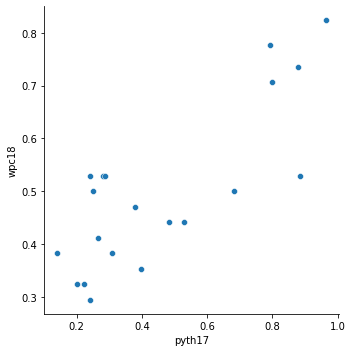

In [28]:
sns.relplot(x="pyth17", y="wpc18", data=predictor)

In [33]:
epl17.sort_values(by="scoredH", ascending=False)

,team,scoredH,concededH,hwin,hg,concededA,scoredA,awin,ag,gp,wins,scored,conceded,wpc17,pyth17
10,Man City,36,7,9.5,10,5,25,10.5,11,21,20.0,61,12,0.952381,0.962743
0,Arsenal,25,10,8.5,10,16,13,5.0,11,21,13.5,38,26,0.642857,0.681132
11,Man United,24,5,9.0,11,11,19,6.5,10,21,15.5,43,16,0.738095,0.878385
4,Chelsea,21,7,8.5,11,7,18,7.0,10,21,15.5,39,14,0.738095,0.885847
9,Liverpool,21,4,8.5,11,20,27,6.5,10,21,15.0,48,24,0.714286,0.800000
16,Tottenham,21,8,7.5,10,12,18,5.5,10,20,13.0,39,20,0.650000,0.791775
6,Everton,17,13,6.5,10,19,8,3.5,11,21,10.0,25,32,0.476190,0.379018
5,Crystal Palace,14,18,5.0,11,14,4,2.5,10,21,7.5,18,32,0.357143,0.240356
1,Bournemouth,14,17,4.5,11,15,6,3.0,10,21,7.5,20,32,0.357143,0.280899
17,Watford,14,23,4.5,11,14,16,4.5,10,21,9.0,30,37,0.428571,0.396651


In [50]:
epl17.sort_values(by="concededA", ascending=False)

,team,scoredH,concededH,hwin,hg,concededA,scoredA,awin,ag,gp,wins,scored,conceded,wpc17,pyth17,diff
14,Stoke,13,19,5.0,10,27,10,2.5,11,21,7.5,23,46,0.357143,0.200000,0.157143
19,West Ham,10,14,4.0,9,24,12,3.0,11,20,7.0,22,38,0.350000,0.251037,0.098963
9,Liverpool,21,4,8.5,11,20,27,6.5,10,21,15.0,48,24,0.714286,0.800000,0.085714
7,Huddersfield,10,12,6.0,11,20,8,3.0,10,21,9.0,18,32,0.428571,0.240356,0.188215
6,Everton,17,13,6.5,10,19,8,3.5,11,21,10.0,25,32,0.476190,0.379018,0.097173
8,Leicester,13,14,5.0,10,18,18,5.0,11,21,10.0,31,32,0.476190,0.484131,0.007941
15,Swansea,6,15,3.0,10,17,7,3.0,11,21,6.0,13,32,0.285714,0.141660,0.144055
12,Newcastle,9,13,4.0,11,17,10,3.0,10,21,7.0,19,30,0.333333,0.286281,0.047053
0,Arsenal,25,10,8.5,10,16,13,5.0,11,21,13.5,38,26,0.642857,0.681132,0.038275
1,Bournemouth,14,17,4.5,11,15,6,3.0,10,21,7.5,20,32,0.357143,0.280899,0.076244


In [44]:
epl17["diff"] = abs(epl17['wpc17'] - epl17['pyth17'])
teams1 = ["Man City", "Liverpool", "Man United", "Arsenal"]
epl17[epl17["team"].isin(teams1)].sort_values(by="diff", ascending=True)

,team,scoredH,concededH,hwin,hg,concededA,scoredA,awin,ag,gp,wins,scored,conceded,wpc17,pyth17,diff
10,Man City,36,7,9.5,10,5,25,10.5,11,21,20.0,61,12,0.952381,0.962743,0.010362
0,Arsenal,25,10,8.5,10,16,13,5.0,11,21,13.5,38,26,0.642857,0.681132,0.038275
9,Liverpool,21,4,8.5,11,20,27,6.5,10,21,15.0,48,24,0.714286,0.800000,0.085714
11,Man United,24,5,9.0,11,11,19,6.5,10,21,15.5,43,16,0.738095,0.878385,0.140290


In [46]:
teams2 = ["Bournemouth", "Stoke", "Leicester", "Brighton"]
epl17[epl17["team"].isin(teams2)].sort_values(by="diff", ascending=True)

,team,scoredH,concededH,hwin,hg,concededA,scoredA,awin,ag,gp,wins,scored,conceded,wpc17,pyth17,diff
8,Leicester,13,14,5.0,10,18,18,5.0,11,21,10.0,31,32,0.476190,0.484131,0.007941
1,Bournemouth,14,17,4.5,11,15,6,3.0,10,21,7.5,20,32,0.357143,0.280899,0.076244
2,Brighton,10,12,5.5,10,13,5,3.0,11,21,8.5,15,25,0.404762,0.264706,0.140056
14,Stoke,13,19,5.0,10,27,10,2.5,11,21,7.5,23,46,0.357143,0.200000,0.157143


In [48]:
teams3 = ["West Ham", "Stoke", "Crystal Palace", "West Brom"]
epl17[epl17["team"].isin(teams3)].sort_values(by="awin", ascending=False)

,team,scoredH,concededH,hwin,hg,concededA,scoredA,awin,ag,gp,wins,scored,conceded,wpc17,pyth17,diff
19,West Ham,10,14,4.0,9,24,12,3.0,11,20,7.0,22,38,0.350000,0.251037,0.098963
5,Crystal Palace,14,18,5.0,11,14,4,2.5,10,21,7.5,18,32,0.357143,0.240356,0.116787
14,Stoke,13,19,5.0,10,27,10,2.5,11,21,7.5,23,46,0.357143,0.200000,0.157143
18,West Brom,10,15,4.5,11,13,5,2.5,10,21,7.0,15,28,0.333333,0.222993,0.110340


In [49]:
teams4 = ["Brighton", "Watford", "Arsenal", "West Ham"]
epl18["hwin-awin"] = epl18["hwin"] - epl18["awin"]
epl18[epl18["team"].isin(teams4)].sort_values(by="hwin-awin", ascending=False)

,team,scoredH,concededH,hwin,hg,concededA,scoredA,awin,ag,gp,wins,scored,conceded,wpc18,pyth18,hwin-awin
0,Arsenal,29,10,7.5,9,15,7,1.0,8,17,8.5,36,25,0.500000,0.674649,6.5
17,Watford,13,8,5.5,8,19,1,0.5,9,17,6.0,14,27,0.352941,0.211892,5.0
2,Brighton,14,13,5.5,9,16,5,1.5,8,17,7.0,19,29,0.411765,0.300333,4.0
19,West Ham,14,12,6.0,10,18,12,3.0,8,18,9.0,26,30,0.500000,0.428934,3.0
